**Task 1:**
### Problem - Develop and evaluate an image classifier using Convolution Neural Network.

### The Data = CIFAR 10 datset.

CIFAR-10 is a dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.
https://www.cs.toronto.edu/~kriz/cifar.html


# CIFAR-10 Multiple Classes
# New section
Example of using Keras for CNNs. Use a famous data set, the CIFAR-10 dataset which consists of 10 different image types.

In [1]:
# import libraries

import pandas as pd
import numpy as np


Following code loads the CIFAR 10 datset.

In [2]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [10]:
# print shapes of training and test data. Check how the data looks


print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [3]:
# print the shape of one image

x_train[0].shape

(32, 32, 3)

### RGB Colour Model)

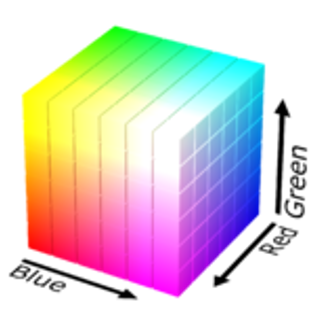

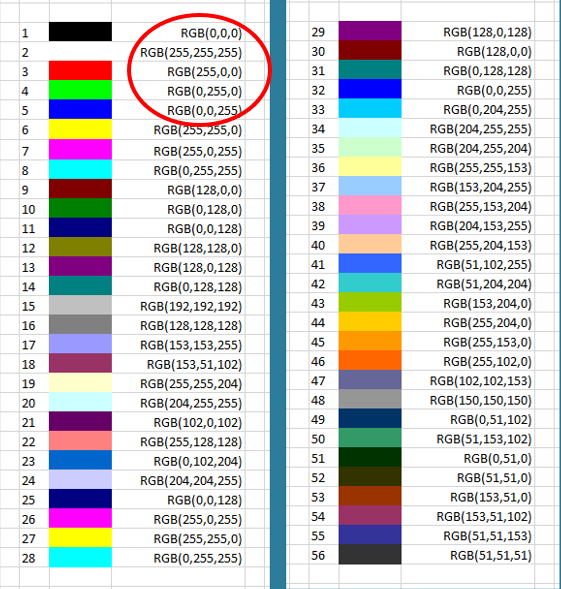

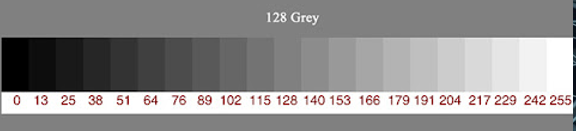

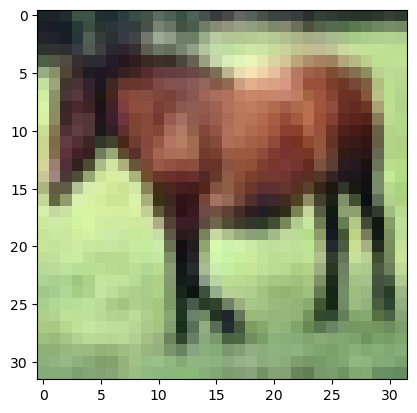

In [4]:
# show any sample image in the dataset. Use - plt.imshow()

import matplotlib.pyplot as plt


# HORSE
plt.imshow(x_train[7]);

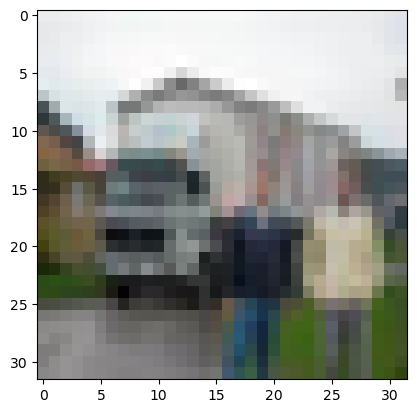

In [13]:
# Show any other image

# TRUCK
plt.imshow(x_train[16]);

In [5]:
# Class names in the CIFAR-10 dataset
classes=['aircraft', 'car', 'bird', 'cat', 'deer',
'dog', 'frog', 'hors', 'ship', 'truck']

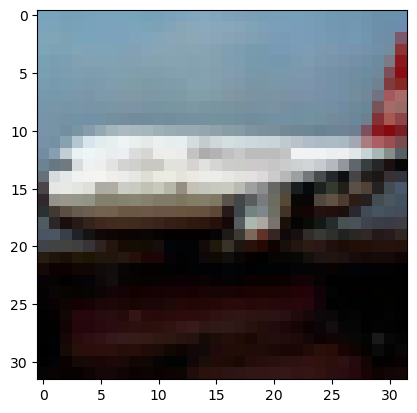

Picture number in the DataBase: 9471
Class number: [0]
Class name: aircraft


In [6]:
# Random Demo example from database

import random # random number generator

from PIL import Image


n = random.randint(0, x_test.shape[0])

# Image.fromarray - for drawing an image from CIFAR-10
plt.imshow(Image.fromarray(x_train[n]))
plt.show()

print("Picture number in the DataBase:", n)
print("Class number:", y_train[n])
print("Class name:", classes[y_train[n][0]])


# You can run this cell many times, and each timeyou will get a new picture


# PreProcessing

In [7]:
# print one image. Check how pixels look like. 

print(x_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [8]:
# print shape of any image i.e particular value in the x_train

x_train[0].shape


(32, 32, 3)

In [9]:
# print the maximum value in x_train. Hint - Use .max()

x_train.max()

255

In [10]:
x_train = x_train/225
x_test  = x_test/255

In [11]:
# Print the shape of x_train again.

x_train.shape


(50000, 32, 32, 3)

In [12]:
# Print the shape of y_train again

y_train.shape

(50000, 1)

# One hot vector encoding.
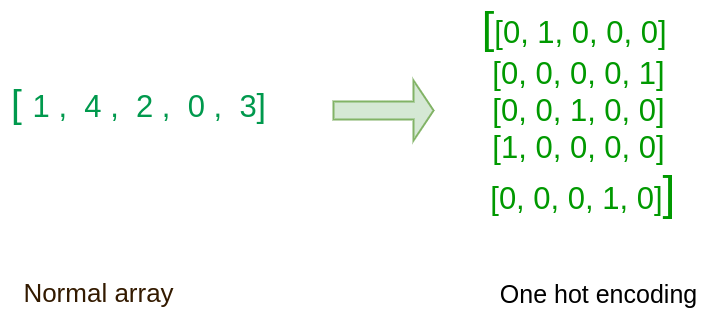


The "to_categorical()" is converting the integer value to binary categorical matrix :: https://keras.io/api/utils/python_utils/#to_categorical-functionLinks to an external site.

In [13]:
from tensorflow.keras.utils import to_categorical


In [14]:
# print shape of y_train

print(y_train.shape)


# Print shape of y_train [0]

print(y_train[0].shape)

(50000, 1)
(1,)


In [15]:
# code to use to_categorical to convert integers to numbers. 
# Assign the new array to the variable y_cat_train

y_cat_train = to_categorical(y_train,10)

In [16]:
# Print shape of the array y_cat_train

y_cat_train.shape

(50000, 10)

In [17]:
print(y_train[0])

# print any single value in the array y_cat_train

print(y_cat_train[0])

[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [18]:
# Convert y_test to the encoded vector in same manner/ Assign it to the variable y_cat_test

y_cat_test = to_categorical(y_test,10)

In [33]:
# Print the shapes to look how y_cat_test looks.

print(y_cat_test.shape)

print(y_test[0])
print(y_cat_test[0])

(10000, 10)
[3]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


----------
# Building the Model

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [20]:
model = Sequential()


# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))
# additional convolution and pooling layers with some choice of filters, strides, and activation function

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=64, kernel_size=(4,4), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())


# Add few dense layers. 

# 256 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(256, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))




C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        32832     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 256)               4

### We could use early stopping in Keras to break from the training.
### What this does is for successive iterations it monitors the loss. If the loss does not decreases for a certain number of iterations denoted by variable 'patience' then the training stops.
### Following code shows how you can use early stopping.


In [21]:
from tensorflow.keras.callbacks import EarlyStopping

In [22]:
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [23]:
#EarlyStopping?

In [24]:
# compile the models (model.compile). Use 'categorical cross entropy as the loss function'

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [25]:
# fit the model (model.fit). Use additional parameter -  callbacks = [early_stop] to eanable early stopping. 

history = model.fit( x_train, y_cat_train,
                # the number of times of training using the whole dataset
                    epochs=15,
                    
                    validation_data =(x_test,y_cat_test),
                    
                # Boolean (whether to shuffle the training data before each epoch)
                    shuffle = True,
                
                # 1 = progress bar printing
                    verbose = 1,
                    
                # early stopping    
                    callbacks=[early_stop] )



Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 42ms/step - accuracy: 0.3813 - loss: 1.7095 - val_accuracy: 0.5676 - val_loss: 1.2405
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 36ms/step - accuracy: 0.6090 - loss: 1.1245 - val_accuracy: 0.5672 - val_loss: 1.2401
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 37ms/step - accuracy: 0.6752 - loss: 0.9272 - val_accuracy: 0.6781 - val_loss: 0.9466
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - accuracy: 0.7230 - loss: 0.8036 - val_accuracy: 0.6014 - val_loss: 1.2019
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.7638 - loss: 0.7039 - val_accuracy: 0.6847 - val_loss: 0.9591
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.7933 - loss: 0.6050 - val_accuracy: 0.6655 - val_loss: 1.0787


### We can save the model in a file. Following code shows how to do this.

In [26]:
# Careful, don't overwrite file!

model.save('cifar_10epochs.h5')

### We can save the loss at every step. Following code shows how to do this. 

In [27]:
losses = pd.DataFrame(model.history.history)

In [28]:
# Print first few rows of losses.

losses.head(8)

,accuracy,loss,val_accuracy,val_loss
0,0.47500,1.471701,0.5676,1.240493
1,0.61906,1.091699,0.5672,1.240098
2,0.68050,0.923834,0.6781,0.946642
3,0.72380,0.801935,0.6014,1.201938
4,0.76130,0.707983,0.6847,0.959133
5,0.78822,0.621857,0.6655,1.078740


### Visualize a plot between accuracy vs val_accuracy for various steps.

### x axis will have the steps (epochs) 
### y axis will have accuracy and val_accuracy and 







<Axes: >

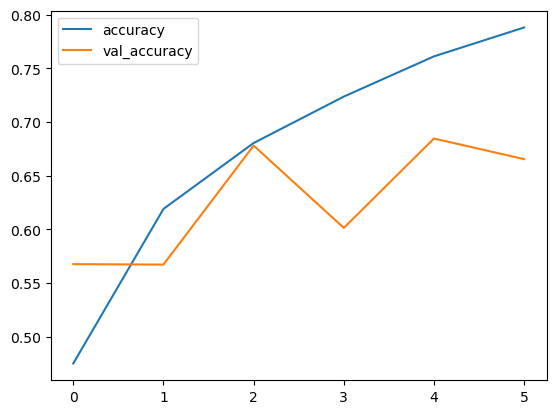

In [29]:
# plot accuracy and val_accuracy wrt the epochs

losses[['accuracy','val_accuracy']].plot()

C:\Users\HP\AppData\Local\Temp\ipykernel_5096\2543472966.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


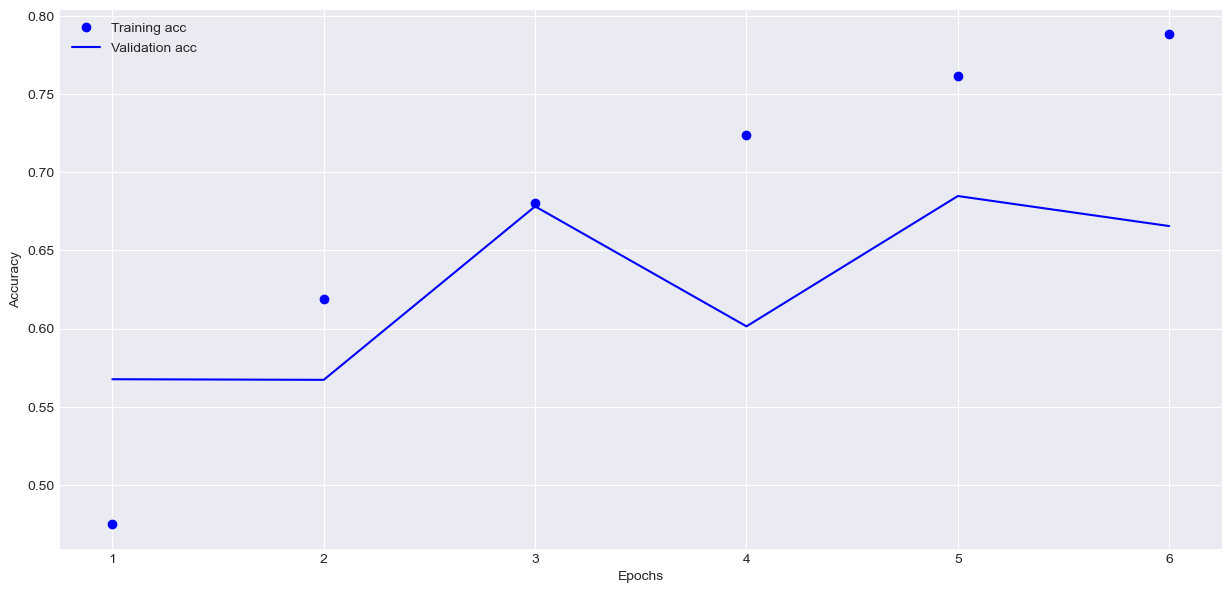

In [30]:
# printing Accuracy for the neural network training process

history_dict = history.history
plt.style.use('seaborn-darkgrid')

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)

plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

<Axes: >

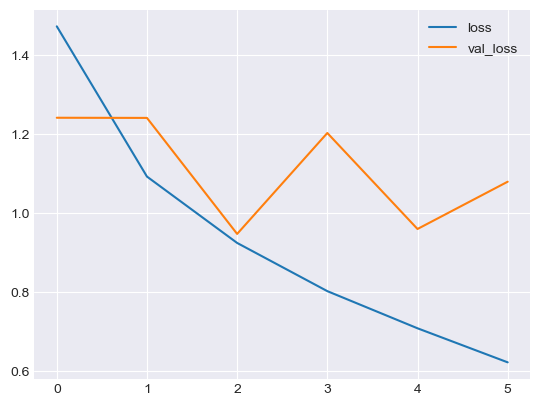

In [31]:
# plot loss and val_loss wrt the epochs

losses[['loss','val_loss']].plot()

C:\Users\HP\AppData\Local\Temp\ipykernel_5096\4006879425.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


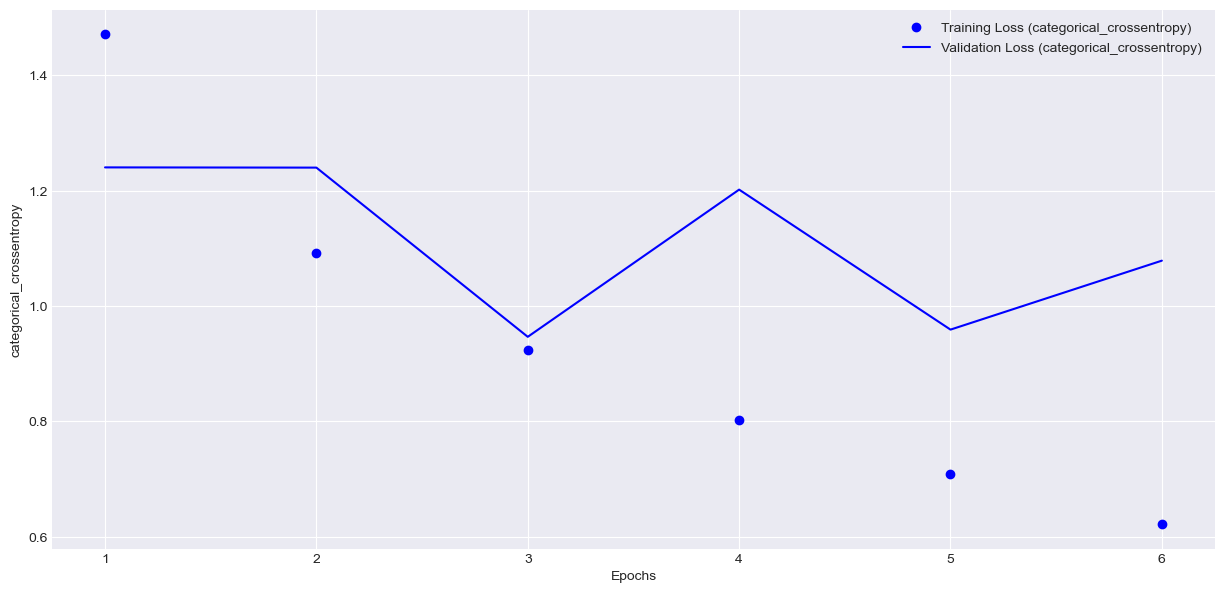

In [32]:
# printing Loss function (categorical_crossentropy) for the neural network training process

history_dict = history.history
plt.style.use('seaborn-darkgrid')

acc_values = history_dict['loss']
val_acc_values = history_dict['val_loss']
epochs = range(1, len(acc_values) + 1)

plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, acc_values, 'bo', label='Training Loss (categorical_crossentropy)')
plt.plot(epochs, val_acc_values, 'b', label='Validation Loss (categorical_crossentropy)')
plt.xlabel('Epochs')
plt.ylabel('categorical_crossentropy')
plt.legend()

plt.show()

### You could print the metrics name that model have used.

### Following code shows how to do this.

In [33]:
model.metrics_names

['loss', 'compile_metrics']

### Following code shows how to evaluate your model.

In [34]:
model.evaluate(x_test,y_cat_test,verbose=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6712 - loss: 1.0818


[1.0787396430969238, 0.6654999852180481]

### Make a prediction on test data set.   

In [35]:
# make predictions on the test dataset. 
# Store the prediction in variable 'predicrion'. Hint - Use model.predict()

#prediction = model.predict(x_test)
prediction = np.argmax(model.predict(x_test), axis = -1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


In [ ]:
prediction

In [ ]:
prediction.shape

In [42]:
#np.argmax?

### We could get the full classification report. Following code does that.

In [36]:
from sklearn.metrics import classification_report

print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.87      0.54      0.67      1000
           1       0.81      0.81      0.81      1000
           2       0.61      0.44      0.51      1000
           3       0.47      0.51      0.49      1000
           4       0.64      0.62      0.63      1000
           5       0.48      0.67      0.56      1000
           6       0.64      0.82      0.72      1000
           7       0.68      0.79      0.73      1000
           8       0.86      0.70      0.77      1000
           9       0.79      0.76      0.77      1000

    accuracy                           0.67     10000
   macro avg       0.69      0.67      0.67     10000
weighted avg       0.69      0.67      0.67     10000



### We could also get and plot confusion matrix. Follwoing code does that. 

In [37]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,prediction)

array([[541,  36, 113,  48,  51,  36,  31,  28,  68,  48],
       [  7, 809,   8,  24,   4,  15,  24,  16,  10,  83],
       [ 28,   9, 441,  77, 109, 140, 123,  62,   5,   6],
       [  5,  11,  34, 513,  50, 246,  79,  57,   2,   3],
       [  4,   1,  36,  84, 619,  87,  92,  71,   2,   4],
       [  1,   3,  17, 146,  36, 673,  47,  72,   1,   4],
       [  1,   3,  14,  69,  22,  54, 816,  20,   1,   0],
       [  3,   2,  11,  45,  53,  82,  10, 785,   0,   9],
       [ 28,  52,  34,  48,  19,  29,  31,  13, 697,  49],
       [  4,  78,  13,  30,   9,  37,  15,  32,  21, 761]], dtype=int64)

<AxesSubplot:>

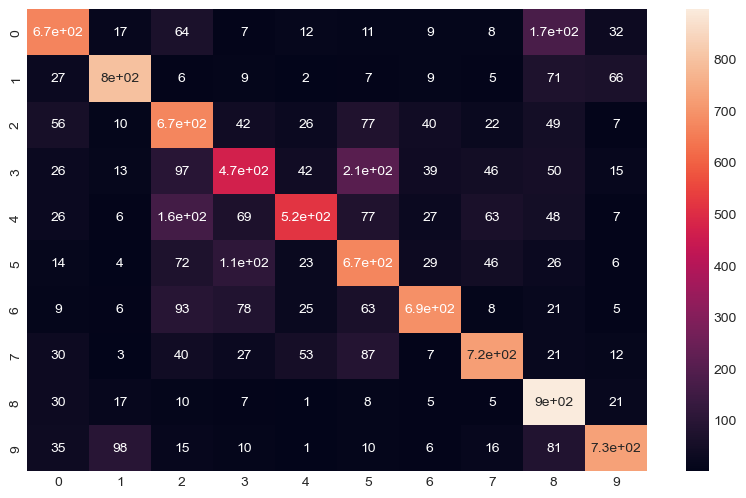

In [45]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,prediction),annot=True)

# https://github.com/matplotlib/matplotlib/issues/14751

# Following code makes a prediction on specific image.

In [38]:
my_image = x_test[16]

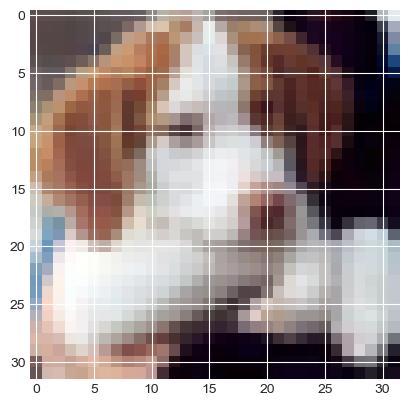

In [39]:
plt.imshow(my_image);

In [40]:
# SHAPE --> (num_images,width,height,color_channels)

#model.predict_classes(my_image.reshape(1,32,32,3))

np.argmax(model.predict(my_image.reshape(1,32,32,3)), axis = -1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


array([5], dtype=int64)

In [49]:
# 5 is DOG

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


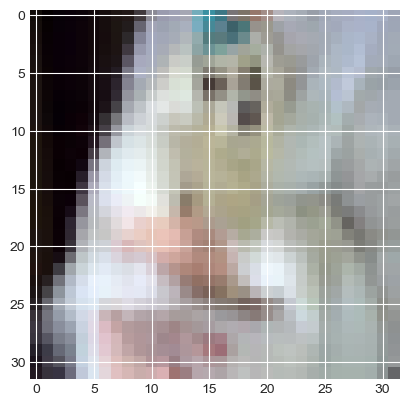

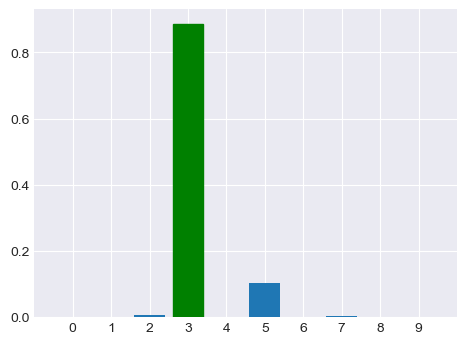

The predicted answer: cat 
 Correct answer: dog
['aircraft', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'hors', 'ship', 'truck']


In [41]:
# image recognition demonstration
# neural network operation

from tensorflow.keras.preprocessing.image import array_to_img

# we take a random element 'random.randint()' from the test sample
# and observe: the neural network will guess or not
index = random.randint(0, x_test.shape[0])
plt.imshow(array_to_img(x_test[index]))

# test image conversion
x = x_test[index]
x = np.expand_dims(x, axis=0)

# start recognition
prediction = model.predict(x)
sample = x

# converting the result from one hot encoding format
ans = np.argmax(prediction)

fig = plt.figure(figsize=(12,4))

ax = fig.add_subplot(1, 2, 2)
bar_list = ax.bar(np.arange(10), prediction[0], align='center')
bar_list[ans].set_color('g')
ax.set_xticks(np.arange(10))
ax.set_xlim([-1, 10])
ax.grid('on')

plt.show()

print('The predicted answer: {}'.format((classes[ans])), "\n",
     'Correct answer: {}'.format(classes[y_test[index][0]]) )

print(classes)


# You can run this cell many times, and each time you will get a new picture,which
# this neural network will recognise with the probability indicated on the graph.

**Task 2:**

Evaluate your model for different optimizers available in the Keras. 

- Store the optimizers in an array.
- Use for loop to fit, compile, and  test your model.
- Plot the accuracy vs optimizer


In [51]:
# Create a list containing the names of optimizers.
# Create an empty list to store scores

# For every optimizer
   # compile your model
   # fit your model
   # find score and append the score in a list

# Plot score vs optimize 

In [42]:
optimizers = ['SGD', 'RMSprop', 'Adam', 'Adadelta']
scores = []

In [43]:
for row in optimizers:
  model.compile(loss='categorical_crossentropy', optimizer= row, metrics=['accuracy'])
  model.fit(x_train,y_cat_train,epochs=3,validation_data=(x_test,y_cat_test),callbacks=[early_stop])
  scores.append(model.evaluate(x_test,y_cat_test,verbose=0))

Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 29ms/step - accuracy: 0.8194 - loss: 0.5338 - val_accuracy: 0.7038 - val_loss: 1.0001
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.8713 - loss: 0.3895 - val_accuracy: 0.7103 - val_loss: 1.0780
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 28ms/step - accuracy: 0.8817 - loss: 0.3471 - val_accuracy: 0.7146 - val_loss: 1.0500
Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 33ms/step - accuracy: 0.8379 - loss: 0.4911 - val_accuracy: 0.6852 - val_loss: 1.0468
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.8544 - loss: 0.4356 - val_accuracy: 0.6838 - val_loss: 1.1673
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 33ms/step - accuracy: 0.8695 - loss: 0.3875 - val_accuracy: 0.6922 - val_loss: 1.2062
Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 35ms/step - accuracy: 0.8834 - loss: 0.3495 - val_accuracy: 0.7030 - val_loss: 1.1931
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 37ms/step - accuracy: 0.9185 - loss: 0

In [50]:
train_accuracy = history.history['accuracy']

val_accuracy = history.history['val_accuracy']

print(f"Training Accuracy: {train_accuracy[4]}")
print(f"Validation Accuracy: {val_accuracy[4]}")

Training Accuracy: 0.7613000273704529
Validation Accuracy: 0.6847000122070312


In [65]:
    
    # Append the training and validation losses to the respective lists
    train_losses.append(history.history['loss'])
    val_losses.append(history.history['val_loss'])
print(f"Training loss: {train_losses[0]}")
print(f"Validation loss: {val_losses[0]}")

Training loss: [1.471700668334961, 1.0916985273361206, 0.9238342046737671, 0.8019353747367859, 0.70798259973526, 0.6218570470809937]
Validation loss: [1.2404927015304565, 1.2400977611541748, 0.9466416835784912, 1.2019383907318115, 0.9591327905654907, 1.0787396430969238]


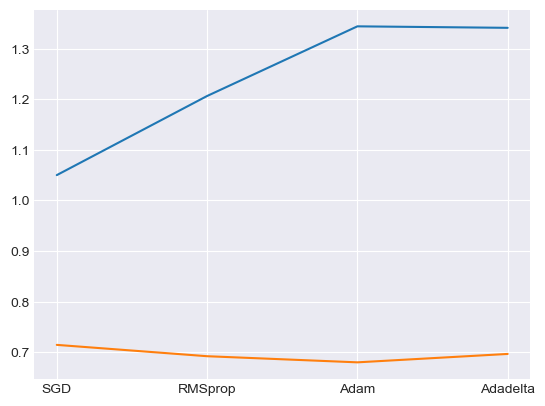

In [51]:
plt.plot (optimizers, scores);

In [52]:
print(scores)

[[1.0499628782272339, 0.7146000266075134], [1.2062305212020874, 0.6922000050544739], [1.3438596725463867, 0.6801000237464905], [1.340917944908142, 0.6966999769210815]]
